In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

file_paths = [
    '/home/eidf018/eidf018/s2484588-epcc/MLP/LLMMemoryEval/results/dialogue_based/mlp_final_results/gemma/results.csv',
    '/home/eidf018/eidf018/s2484588-epcc/MLP/LLMMemoryEval/results/dialogue_based/mlp_final_results/llama2/results.csv',
]


df_list = [pd.read_csv(file_path) for file_path in file_paths]
df = pd.concat(df_list)



In [30]:
print(df.columns)

Index(['model_name', 'turn', 'key', 'acc_score', 'map_score', 'acc_A', 'acc_B',
       'acc_C', 'hotel_acc', 'train_acc', 'attraction_acc', 'restaurant_acc',
       'A', 'B', 'C'],
      dtype='object')


In [2]:
plt.figure(figsize=(10, 6))
for model_name in df['model_name'].unique():
    model_df = df[df['model_name'] == model_name]
    plt.plot(model_df.loc[:5, 'turn'], model_df.loc[:5, 'acc_score'], label=model_name)

plt.xlabel('Turn')
max_turn = df['turn'].max()
plt.xticks(np.arange(1, max_turn + 1, step=1))
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Score by Turn')
plt.legend()
plt.grid(True)

#plt.savefig("accuracy_score_by_turn.pdf")

plt.show()

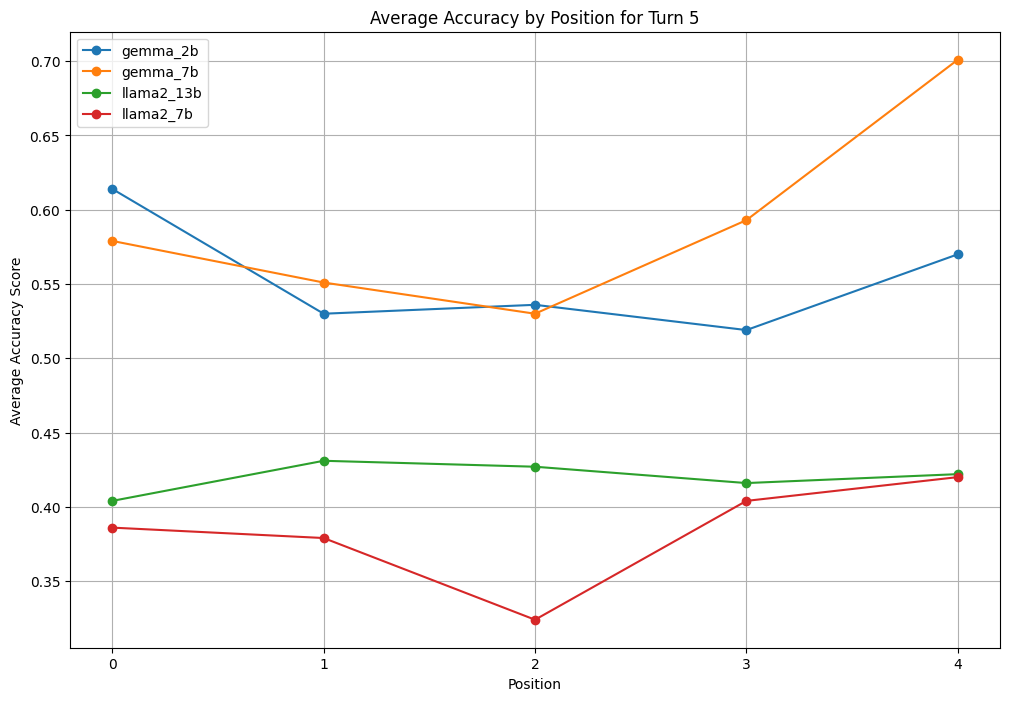

In [26]:

df['position'] = df['key'].apply(lambda x: x.split('-')[-1])

df['position'] = df['position'].astype(int)

df_turn_5 = df[df['key'].str.contains('-5-')]
positions = np.sort(df_turn_5['position'].unique())
models = df_turn_5['model_name'].unique()

plt.figure(figsize=(12, 8))

for model_name in models:
    model_df = df_turn_5[df_turn_5['model_name'] == model_name]
    avg_acc_scores = model_df.groupby('position')['acc_score'].mean()
    plt.plot(positions, avg_acc_scores, marker='o', label=model_name)

plt.xticks(positions)
plt.xlabel('Position')
plt.ylabel('Average Accuracy Score')
plt.title('Average Accuracy by Position for Turn 5')
plt.legend()
plt.grid(True)
#plt.savefig('accuracy_by_position_turn_5.pdf')


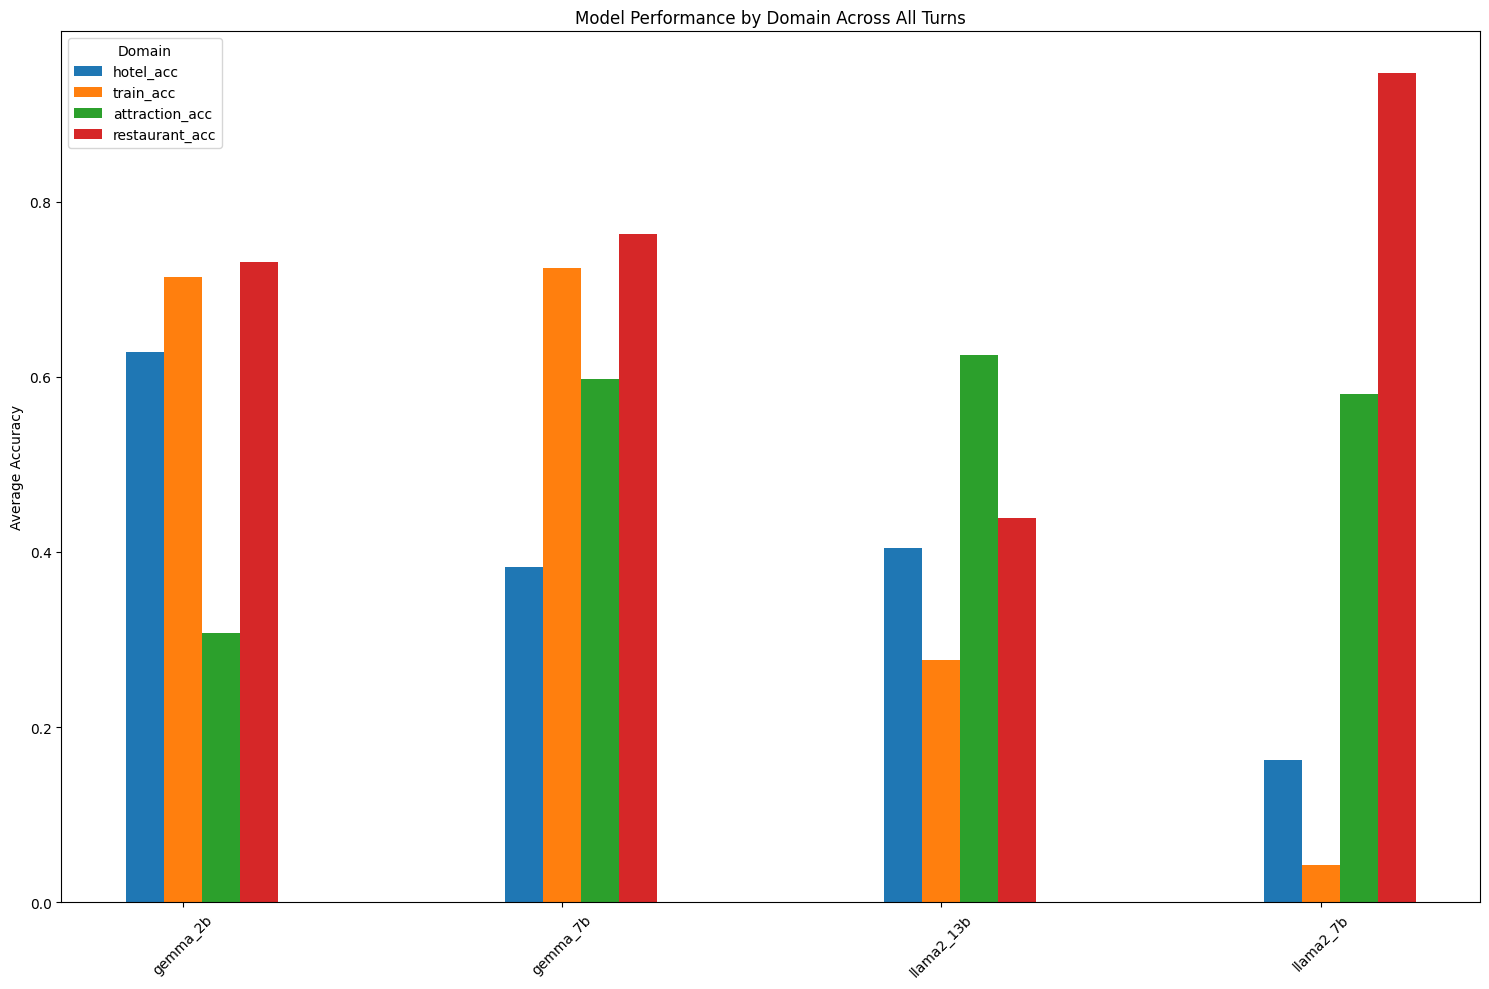

In [27]:
domain_cols = ['hotel_acc', 'train_acc', 'attraction_acc', 'restaurant_acc']
model_domain_avg = df.groupby('model_name')[domain_cols].mean().reset_index()
bar_data = pd.melt(model_domain_avg, id_vars=['model_name'], value_vars=domain_cols,
                   var_name='Domain', value_name='Average Accuracy')
plt.figure(figsize=(15, 10))

models = bar_data['model_name'].unique()
domains = bar_data['Domain'].unique()

x = np.arange(len(models))
width = 0.1

for i, domain in enumerate(domains):
    domain_avg = bar_data[bar_data['Domain'] == domain]['Average Accuracy']
    plt.bar(x + i*width, domain_avg, width, label=domain)

plt.ylabel('Average Accuracy')
plt.title('Model Performance by Domain Across All Turns')
plt.xticks(x + width, models, rotation=45)
plt.legend(title='Domain')
plt.tight_layout()
#plt.savefig('overall_performance_by_model_domain.pdf')


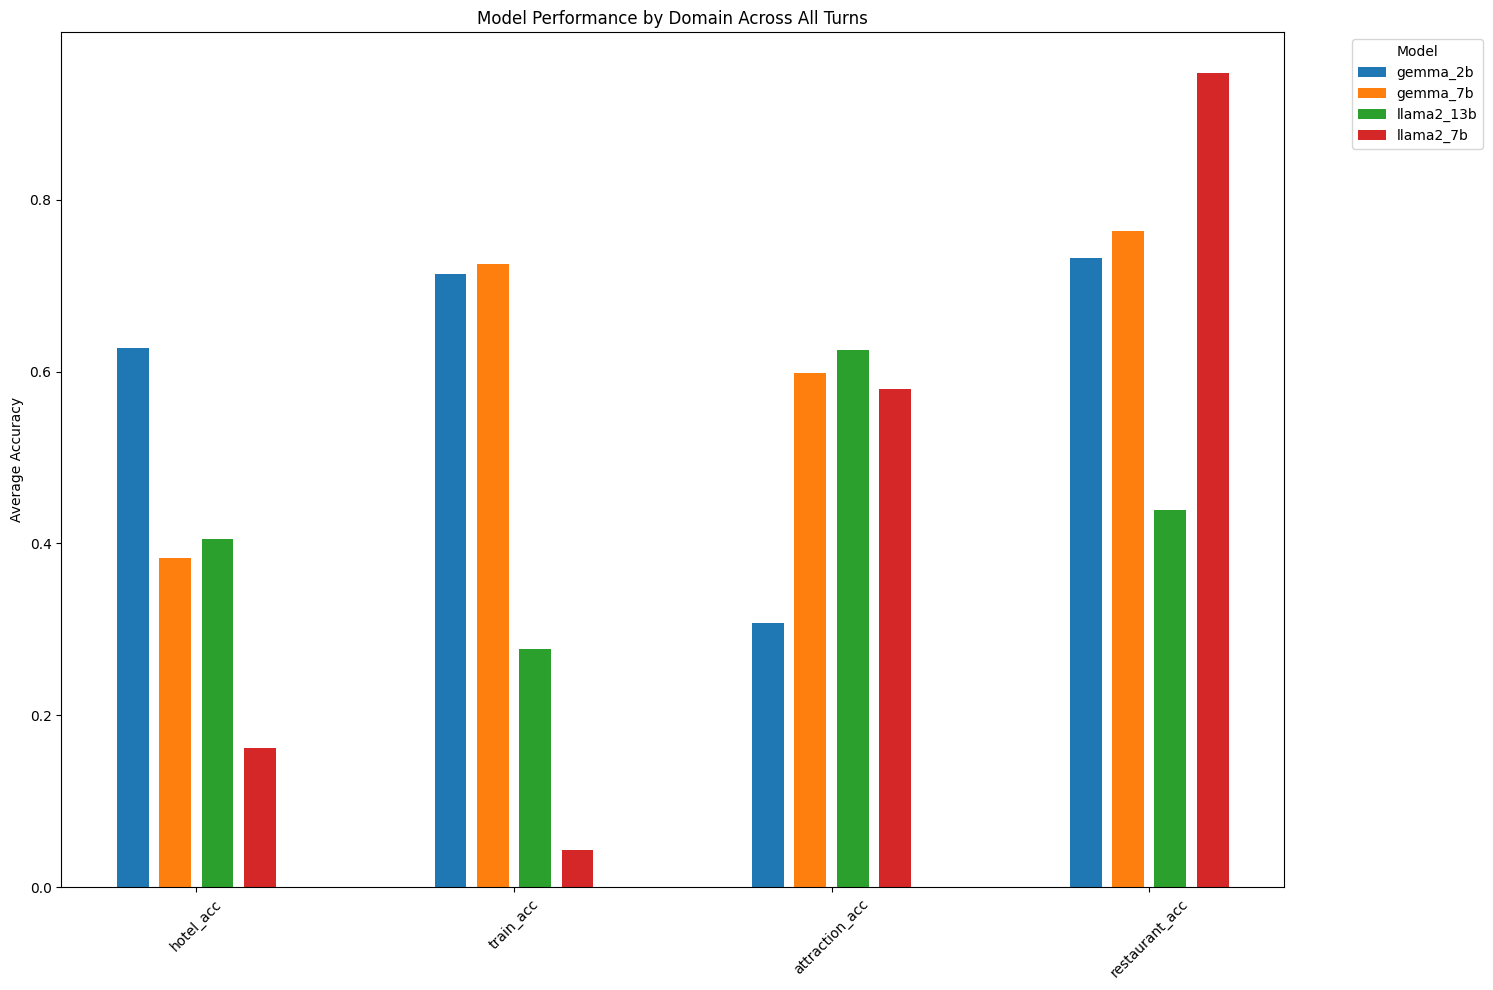

In [23]:
plt.figure(figsize=(15, 10))

models = bar_data['model_name'].unique()
domains = domain_cols 

x = np.arange(len(domains))
width = 0.1

offsets = np.linspace(-width*len(models)/2, width*len(models)/2, len(models))

for i, model in enumerate(models):
    model_avgs = []
    for domain in domains:
        domain_avg = bar_data[(bar_data['model_name'] == model) & (bar_data['Domain'] == domain)]['Average Accuracy'].values
        if len(domain_avg) > 0:
            model_avgs.append(domain_avg[0])
        else:
            model_avgs.append(0)
    plt.bar(x + offsets[i], model_avgs, width, label=model)

plt.ylabel('Average Accuracy')
plt.title('Model Performance by Domain Across All Turns')
plt.xticks(x, domains, rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('performance_by_domain_models.pdf')
